In [32]:
# importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
# read dataset
yearly = pd.read_csv('datasets/yearly_deaths_by_clinic.csv')
monthly = pd.read_csv('datasets/monthly_deaths.csv', parse_dates=['date'])

In [ ]:
# print out yearly and monthly
print(yearly)
print(monthly)

In [4]:
# Calculate proportion of deaths per no. births for each year
yearly['proportion_deaths'] = yearly.deaths.divide(yearly.births)

In [7]:
# Extract clinic 1 data into yearly1 and clinic 2 data into yearly2
yearly1 = yearly[yearly.clinic == 'clinic 1']
yearly2 = yearly[yearly.clinic == 'clinic 2']

# Print out yearly1
print(yearly1)

   year  births  deaths    clinic  proportion_deaths
0  1841    3036     237  clinic 1           0.078063
1  1842    3287     518  clinic 1           0.157591
2  1843    3060     274  clinic 1           0.089542
3  1844    3157     260  clinic 1           0.082357
4  1845    3492     241  clinic 1           0.069015
5  1846    4010     459  clinic 1           0.114464


Text(0,0.5,'proportion_deaths')

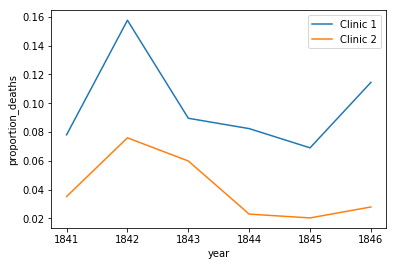

In [12]:
ax = yearly1.plot(x="year", y="proportion_deaths", label="Clinic 1")
yearly2.plot(x="year", y="proportion_deaths", label="Clinic 2", ax=ax)
ax.set_ylabel("proportion_deaths")

In [16]:
# Calculate proportion of deaths per no. births for each month
monthly['proportion_deaths'] = monthly.deaths.divide(monthly.births)

In [17]:
# Print out the first rows in monthly
print(monthly.head())

        date  births  deaths  proportion_deaths
0 1841-01-01     254      37           0.145669
1 1841-02-01     239      18           0.075314
2 1841-03-01     277      12           0.043321
3 1841-04-01     255       4           0.015686
4 1841-05-01     255       2           0.007843


Text(0,0.5,'proportion deaths')

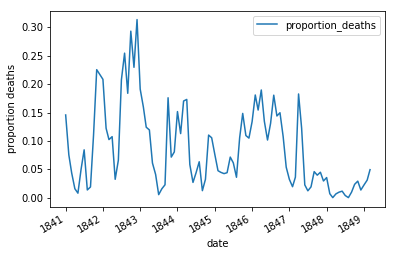

In [19]:
# Plot monthly proportion of deaths
ax = monthly.plot(x="date", y="proportion_deaths")
ax.set_ylabel("proportion deaths")

In [20]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

In [21]:
# Split monthly into before and after handwashing_start
before_washing = monthly[monthly["date"] < handwashing_start]
after_washing = monthly[monthly["date"] >= handwashing_start]

In [22]:
print(before_washing.head())

        date  births  deaths  proportion_deaths
0 1841-01-01     254      37           0.145669
1 1841-02-01     239      18           0.075314
2 1841-03-01     277      12           0.043321
3 1841-04-01     255       4           0.015686
4 1841-05-01     255       2           0.007843


Text(0,0.5,'proportion_deaths')

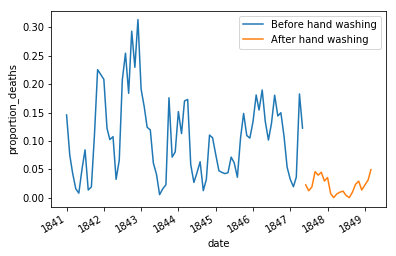

In [24]:
# Plot monthly proportion of deaths before and after handwashing
ax = before_washing.plot(x="date", y="proportion_deaths", label="Before hand washing")
after_washing.plot(x="date", y="proportion_deaths", label="After hand washing", ax=ax)
ax.set_ylabel("proportion_deaths")

In [25]:
# Difference in mean monthly proportion of deaths due to handwashing
before_proportion = before_washing.proportion_deaths
after_proportion = after_washing.proportion_deaths
mean_diff = after_proportion.mean() - before_proportion.mean()
print(mean_diff)

-0.0839566075118334


In [33]:
# To get a feeling for the uncertainty around how much handwashing reduces mortalities we could look at a confidence interval
# A bootstrap analysis of the reduction of deaths due to handwashing
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append(boot_after.mean() - boot_before.mean())

# Calculating a 95% confidence interval from boot_mean_diff 
confidence_interval = np.percentile(boot_mean_diff, [2.5, 97.5])
print(confidence_interval)

[-0.1005588  -0.06700301]
